# Week 07: Linear and logistic regression
### Introduction

This week, we will get some first-hand experience with regression.
We will implement gradient descent for linear regression. Then we will proceed to classification, first by using linear regression and then logistic regression.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## NumPy
We will first familiarize ourselves a little with NumPy. A function which we will use over again is `linspace(x1,x2,N)` which makes a vector of length $N$ splitting the interval $[x1,x2]$ into equally sized intervals.

In [ ]:
xx = np.linspace(-5,5,101)
xx[:10]

One of the major improvements from using NumPy is the possibilty of computing many values by applying a function to a numpy array.

In [ ]:
y1 = -6*xx**3 + xx**2 -3*xx + 5

`y1`will contain the corresponding function values for each element `x`in `xx`. We may plot the result.

In [ ]:
plt.plot(xx,y1)

## Dataset for linear regression
We will start with a smooth curve and add some "noise". The underlying idea is that the smooth curve represents the function we are looking for, and that this is the best we can hope to learn. A solution which does better  on the training material than the smooth curve is probably overfit and will not generalize as well to new data as the smooth curve. We are using a normal distribution to generate noise. The numpy function `normal` will generate a vector of `size` many random points around `loc` from a distribution with standard deviation `scale`.

In [ ]:
from numpy.random import normal
t = y1 + normal(loc=0, scale=50, size=101)
plt.scatter(xx, t)

Our training data now consists of pairs (xx[i], t[i]), where xx[i] is the datapoint and t[i] the target value. So far, both `xx` and `t` are vectors. Check their shapes, e.g., `xx.shape`. The goal is to make an implementation for linear regression which works with an arbitrary number of input features and not just one. We will therefore transform `xx` to a matrix of dimension $N\times m$ where each row represents one datapoint, and m is the number of input variables (or features). Check the shape of `X` after the transform.

In [ ]:
X = xx.reshape(-1,1)

## Part A: Linear regression

We will implement our own linear regression model. Our aim is to find an approximate function that fits the data generated above.

Since we are dealing with only one input variable, we start with a simple linear function, $f(x_1) = w_0 + w_1x_1$.

### Exercise 1: MSE

We wonder if our $f$ fits the data well, and what parameters will give us the best approximation. We will estimate this using the Mean Squared Error:

$\frac{1}{N} \sum_{j=1}^{N} (t_j - \sum_{i=0}^{m} w_ix_{ji})^2$

Write a function calculating MSE of our approximation.

In [ ]:
# Your code here
def mse_extensive(x, w, t, n):
    sum = 0
    for (xi, wi, ti) in zip(x, w, t):
        sum += (ti - xi.sum(wi))**2
    return sum/n

def mse(y, y_pred):
    return np.mean((y-y_pred)**2)

### Exercise 2: Testing the MSE
To test our implementation, we can take the function $f(x_1)=0$ as a baseline and calculate the MSE for this $f$. Also calculate the Root Means Square Error which provides a more natural measure for how good the fit is.

In [ ]:
# Testing 
test_array = np.array([0 for _ in xx])
res = mse(test_array, t)
print(f"MSE: {res}")

In [ ]:
# Root mean square error 
print(f"RMSE: {np.sqrt(res)}")

### Exercise 3: Adding bias

We will implement linear regression with gradient descent and test it on the data. To make it simple, we will add a $x_0=1$ to all our datapoints, and consider $f(x_1) = w_0 + w_1x_1$ as $f(x_0, x_1) = w_0x_0+ w_1x_1$. Make a procedure that does this.

In [ ]:
def add_bias(X):
    """X is a Nxm matrix: N datapoints, m features
    Return a Nx(m+1) matrix with added bias in position zero"""
    (N, m) = X.shape

    # Bias vector that can be put in the end
    bias = np.zeros((N, 1))

    # Concatenate the column of bias in front of the columns of X
    return np.concatenate((bias, X), axis=1)

### Exercise 4: Gradient Descent
We will implement the linear regression in a class as we did with the classifiers earlier. The fit method will run the gradient descent step a number of times to train the classifier. The predict method should take a matrix containing several data points and predict the outcome for all of them. Fill in the methods.

Assume that the matrix of training data is not extended with bias features. Hence, make adding bias a part of your methods.

After training there should be an attribute with learned coeffecients (weights) which is applied by the predict method.


In [35]:
class NumpyLinReg():

    def __init__(self) -> None:
        """Create a new model with no weights"""
        self.weights = None

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train is a vector of length N,
        the targets values for the training data"""
        (N, m) = X_train.shape


        # Add the bias to training data
        X_train = add_bias(X_train)

        # Set the weights to empty zeros 
        self.weights = np.zeros(m+1)

        # Training 
        for _ in range(epochs):
            self.weights -= eta/N * X_train.T @ (X_train @ self.weights - t_train)

    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        Z = add_bias(X)
        return Z @ self.weights


### Exercise 5: Train and test the model
Fit the model to the training data. Report the coefficients. Plot the line together with the observations. Calculate the RMSE. Is the result a better fit than the baseline constant function $f(x)=0$?

In [36]:
# Creating the model and train 
model = NumpyLinReg()
model.fit(X,t, epochs=100)
print(f"Model weights : {model.weights}")

Model weights : [  0.         -93.59255296]


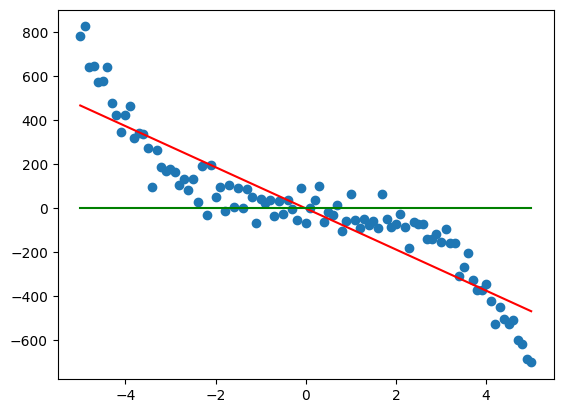

In [38]:
# Plot the model regression line in red
plt.plot(X, model.weights[0]+model.weights[1]*X, color="r")

# Plot the baseline 
plt.plot(X, [0 for i in X], 'g')

# Plot the data itself
plt.scatter(X, t)


In [40]:
# Create predictions and then calculating the error rate of the model  
predictions = add_bias(X) @ model.weights
error = mse(t, predictions)

# Printing the MSE and RMSE 
print(f"MSE : {error}")
print(f"RMSE : {np.sqrt(error)}")

MSE : 15403.535061362094
RMSE : 124.11097881074862


## Dataset for classification
We will use simple synthetic data similarly to week_05, but we will make the set a little bigger  to get more reliable results.

In [41]:
from sklearn.datasets import make_blobs
X_train, y_train = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2022)
X_test, y_test = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2023)

In [42]:
def show(X, y, marker='.'):
    labels = set(y)
    for lab in labels:
        plt.plot(X[y == lab][:, 1], X[y == lab][:, 0],
                 marker, label="class {}".format(lab))
    plt.legend()

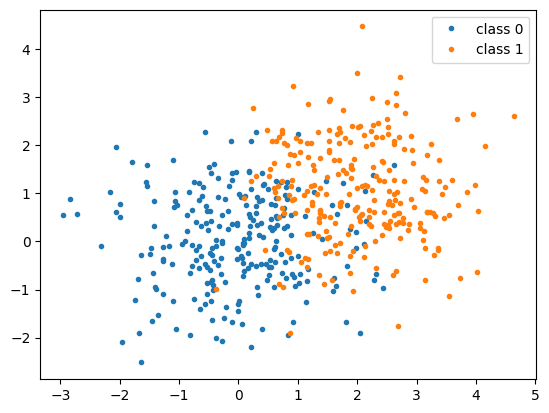

In [43]:
show(X_train, y_train)

## Linear Regression classifier
This is also called Ridge Classifier in the literature when it is smoothed. We will consider the simple unsmoothed version here and return to smoothing and regularization later.

### Exercise 6: Coding the classifier
Make a linear regression classifier. Make it as a Python class with methods for 'fit' and 'predict', similarly to the linear regression above and the *k*NN classifier from week_05 exercises.

In [44]:
class NumpyLinRegClassifier:

    def __init__(self) -> None:
        """Create a new model with no weights"""
        self.weights = None

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train is a vector of length N,
        the targets values for the training data"""
        (N, m) = X_train.shape


        # Add the bias to training data
        X_train = add_bias(X_train)

        # Set the weights to empty zeros 
        self.weights = np.zeros(m+1)

        # Training 
        for _ in range(epochs):
            self.weights -= eta/N * X_train.T @ (X_train @ self.weights - t_train)

    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        Z = add_bias(X)
        return Z @ self.weights

### Exercise 7: Experiment
We will conduct repeated testing. We therefore need a development test set different from the final test set. Make such a set X_dev, y_dev, similarly to X_test, y_test using random_state=2024. Train the classfier on X_train, y_train and test for accuracy on X_dev, y_dev.

You also need a procedure for accuracy here.

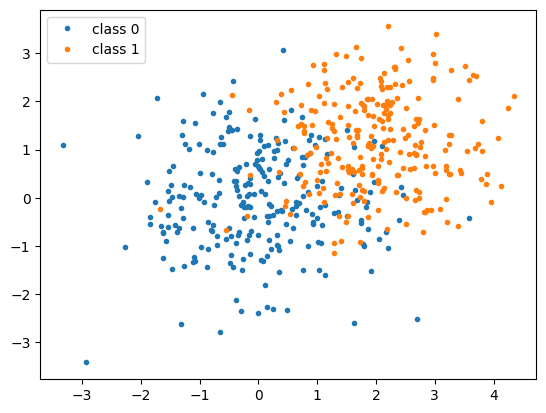

In [46]:
# Creating the dataset 
X_dev, y_dev = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2024)

# Plotting the dataset
show(X_dev, y_dev)

## Logistic Regression

### Exercise 8: The logistic function
Implement the logistic function. Sometimes called just the sigmoid.

In [ ]:
def logistic(x):
    # fill in the rest
    pass

### Exercise 9: Code for the classifier
Write code for the logistic regression classifier. Compared to linear regression classifier you have to make adaptions to both fit and predict taking the logistic into consideration


### Exercise 10: Initial experiments
Train the classfier on X_train, y_train and test for accuracy on X_dev, y_dev.

### Exercise 11: Repeated experimentation
Did you get better results than with the linear regression classifier? That does not necessary have to be the case for this data set. But, if your result is much inferior to the linear regression classifier, the reason might be the parameter settings. Experiment with the parameter values for the learning rate and the number of epochs to get an optimal result.